In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import project

## Importation des données

In [129]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [130]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [132]:
df = data.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [133]:
df.shape

(299, 13)

Notre base des données contient 299 lignes et 13 colonnes

In [134]:
df.dtypes #Toutes nos variables sont quantitatives

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [135]:
df.dtypes.value_counts()

int64      10
float64     3
dtype: int64

In [136]:
df.isna().sum() #on vérifie la présence de données manquantes dans notre dataset.

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

À l'issu de cette importation, nous voyons que notre dataset n'a aucunes données manquantes, toutes nos variables sont quantitatives et cela facilitera notre étude. Nous avons des variables catégorielles dont notre variable target **DEATH_EVENT** qui prend la valeur 1 ou 0 soit dèces ou non.

### Élimination des variables inutiles

In [137]:
df = df.drop('time', axis = 1)
df.head() #Nous éliminons la variable 'Time' car elle ne nous apporte rien!

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


## Examen de la colonne target

Examinons la colonne target afin de connaître le pourcentage des personnes qui sont mortes ou qui ont survecu à l'insuffisance cardiaque

In [138]:
df['DEATH_EVENT'].value_counts(normalize = True) #normalize = true : nous permet d'affficher le poucentage

#Nous voyons que 32% des patients sont morts d'une insuffisance cardiaque, et à peu près 68% des patients ont survecu.

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

Text(0.5, 1.0, 'Nb insuffisance cardiaque')

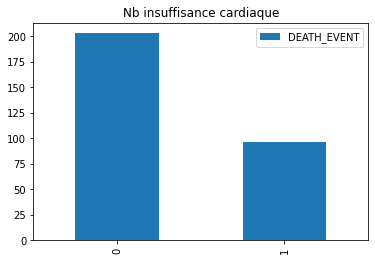

In [139]:
#df.rename(columns={'DEATH_EVENT':'Mort'},inplace=True)
df['DEATH_EVENT'].value_counts().plot(kind='bar',legend=True)
plt.title('Nb insuffisance cardiaque')

## Quelques statistiques sur nos données

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Examen des colonnes catégorielles

#### Création d'une base des données ne contenant que les variables catégorielles

In [141]:
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
categorical_columns

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque

Text(0.5, 1.0, 'Men and women survival rates')

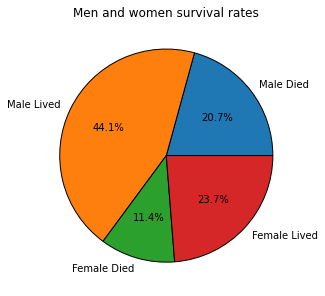

In [142]:
male = df[df.sex == 1]
female = df[df.sex == 0 ]

male_lived = male[male.DEATH_EVENT == 0]
male_died = male [male.DEATH_EVENT ==1]
female_lived = female[female.DEATH_EVENT ==0]
female_died =  female[female.DEATH_EVENT ==1]
data = [len(male_died), len(male_lived),len(female_died),len(female_lived)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Men and women survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque tout en étant diabétiques

Text(0.5, 1.0, 'Diabetes survival rates')

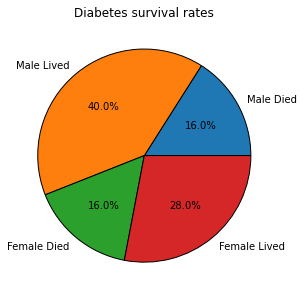

In [143]:
male_died_diabetes = male_died[male_died.diabetes==1]
male_lived_diabetes = male_lived[male_lived.diabetes==1]
female_died_diabetes = female_died[female_died.diabetes==1]
female_lived_diabetes = female_lived[female_lived.diabetes==1]
data = [len(male_died_diabetes), len(male_lived_diabetes),len(female_died_diabetes),len(female_lived_diabetes)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Diabetes survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque sans être diabétiques

Text(0.5, 1.0, 'Non-Diabetes survival rates')

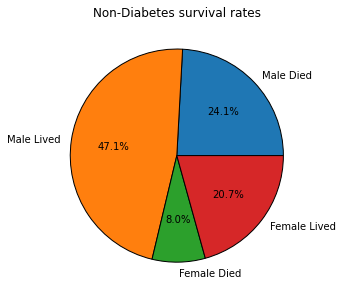

In [144]:
male_died_diabetes = male_died[male_died.diabetes==0]
male_lived_diabetes = male_lived[male_lived.diabetes==0]
female_died_diabetes = female_died[female_died.diabetes==0]
female_lived_diabetes = female_lived[female_lived.diabetes==0]
data = [len(male_died_diabetes), len(male_lived_diabetes),len(female_died_diabetes),len(female_lived_diabetes)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Non-Diabetes survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque tout en étant anémiques

Text(0.5, 1.0, 'Anaemia survival rates')

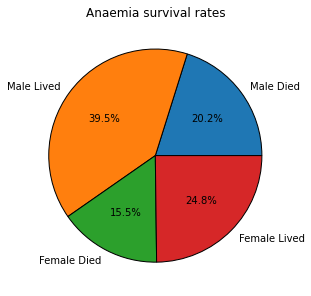

In [145]:
male_died_anemia = male_died[male_died.anaemia==1]
male_lived_anemia = male_lived[male_lived.anaemia==1]
female_died_anemia = female_died[female_died.anaemia==1]
female_lived_anemia = female_lived[female_lived.anaemia==1]
data = [len(male_died_anemia), len(male_lived_anemia),len(female_died_anemia),len(female_lived_anemia)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Anaemia survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque sans être anémiques

Text(0.5, 1.0, 'Non-Anaemia survival rates')

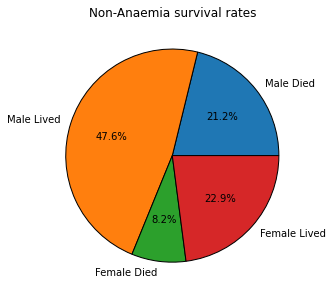

In [146]:
male_died_anemia = male_died[male_died.anaemia==0]
male_lived_anemia = male_lived[male_lived.anaemia==0]
female_died_anemia = female_died[female_died.anaemia==0]
female_lived_anemia = female_lived[female_lived.anaemia==0]
data = [len(male_died_anemia), len(male_lived_anemia),len(female_died_anemia),len(female_lived_anemia)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Non-Anaemia survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque tout en ayant l'hypertension artérielle

Text(0.5, 1.0, 'High Blood Pressure survival rates')

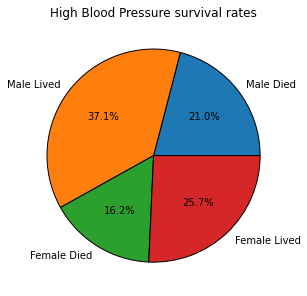

In [147]:
male_died_hbp = male_died[male_died.high_blood_pressure==1]
male_lived_hbp= male_lived[male_lived.high_blood_pressure==1]
female_died_hbp = female_died[female_died.high_blood_pressure==1]
female_lived_hbp= female_lived[female_lived.high_blood_pressure==1]
data = [len(male_died_hbp), len(male_lived_hbp),len(female_died_hbp),len(female_lived_hbp)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('High Blood Pressure survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque sans avoir l'hypertension artérielle

Text(0.5, 1.0, 'Non-High Blood Pressure survival rates')

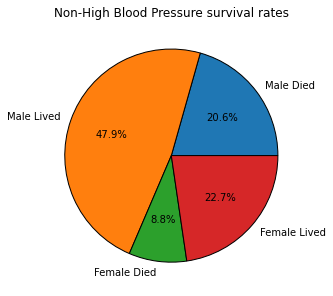

In [148]:
male_died_hbp = male_died[male_died.high_blood_pressure==0]
male_lived_hbp= male_lived[male_lived.high_blood_pressure==0]
female_died_hbp = female_died[female_died.high_blood_pressure==0]
female_lived_hbp= female_lived[female_lived.high_blood_pressure==0]
data = [len(male_died_hbp), len(male_lived_hbp),len(female_died_hbp),len(female_lived_hbp)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Non-High Blood Pressure survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque tout en étant fumeurs

Text(0.5, 1.0, 'Smoking survival rates')

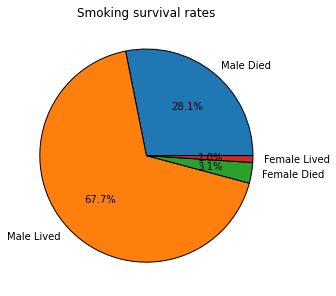

In [149]:
male_died_smoke = male_died[male_died.smoking==1]
male_lived_smoke= male_lived[male_lived.smoking==1]
female_died_smoke = female_died[female_died.smoking==1]
female_lived_smoke= female_lived[female_lived.smoking==1]
data = [len(male_died_smoke), len(male_lived_smoke),len(female_died_smoke),len(female_lived_smoke)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Smoking survival rates')

### Nous allons afficher le pourcentage d'hommes et des femmes qui ont survecu ou ont succombé à une insufficance cardiaque sans être fumeurs

Text(0.5, 1.0, 'Non-Smoker survival rates')

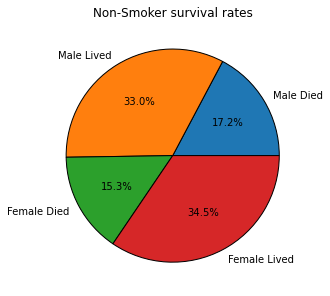

In [150]:
male_died_smoke = male_died[male_died.smoking==0]
male_lived_smoke= male_lived[male_lived.smoking==0]
female_died_smoke = female_died[female_died.smoking==0]
female_lived_smoke= female_lived[female_lived.smoking==0]
data = [len(male_died_smoke), len(male_lived_smoke),len(female_died_smoke),len(female_lived_smoke)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()

plt.title('Non-Smoker survival rates')

### Création de sous-ensembles vivants et morts

Étant donné qu'ici nous avons deux groupes d'individus càd les individus vivants et les individus décédés, on va commencer par créer des sous-ensembles avec d'une part nos individus en vie et d'autre part nos individus morts pour faciliter l'analyse après.

In [151]:
vivants_df = df[df['DEATH_EVENT'] == 0]

In [152]:
morts_df = df[df['DEATH_EVENT'] == 1]

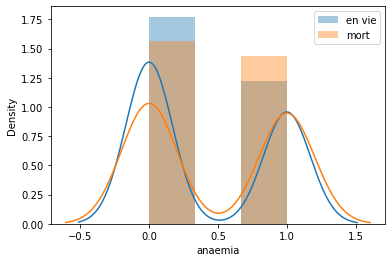

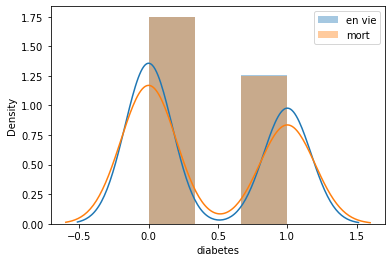

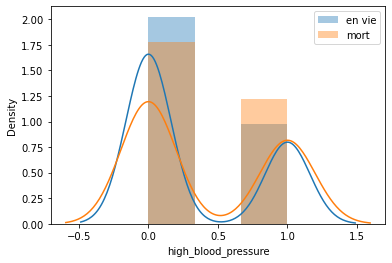

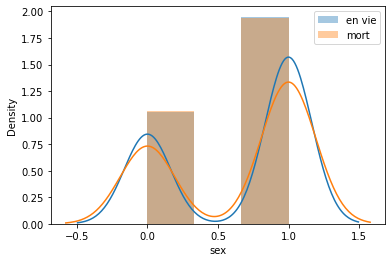

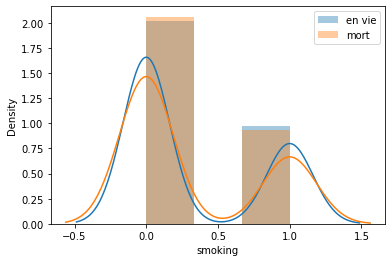

In [153]:
for col in categorical_columns:
    plt.figure()
    sns.distplot(vivants_df[col], label = 'en vie')
    sns.distplot(morts_df[col], label = 'mort')
    plt.legend()

Dans ces différents graphiques, nous pouvons que 

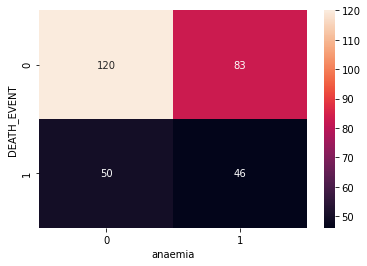

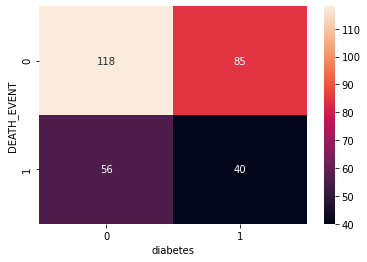

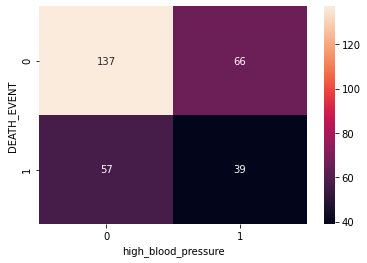

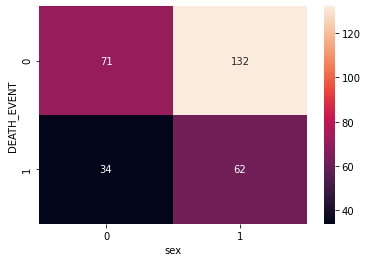

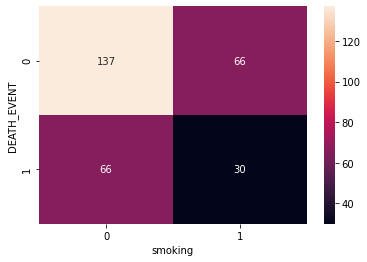

In [154]:
for col in categorical_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['DEATH_EVENT'], df[col]), annot = True, fmt = 'd')
    
#Cette boucle "for" permet de piocher l'une après l'autre les différentes variables que l'on a dans categorical_columns
#l'argument "annot" permet de d'afficher le nombre dans notre heatmap,l'argument fmt='d' permet de spécifier que les chiffres 
#affichés dans le graphique sont des entiers.

## Boîte à moustaches de l'âge en fonction la target 

In [155]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

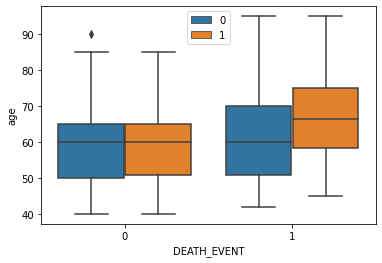

In [156]:
ax = sns.boxplot(y = "age", x = "DEATH_EVENT", data = df, hue = 'sex') 
plt.legend(loc='upper center')
plt.show() 

## Examen des colonnes continues

In [157]:
continous_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
continous_columns

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

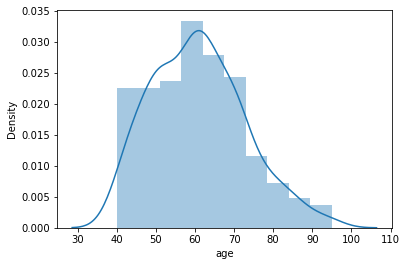

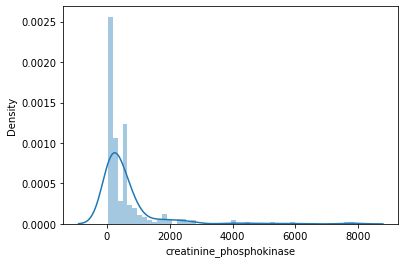

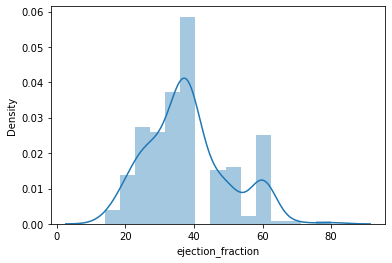

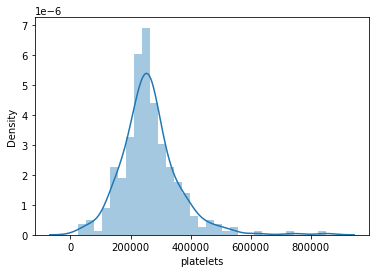

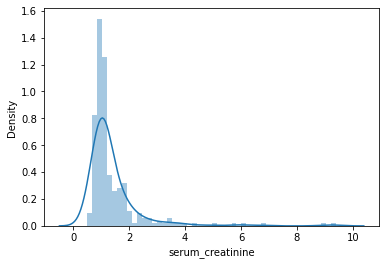

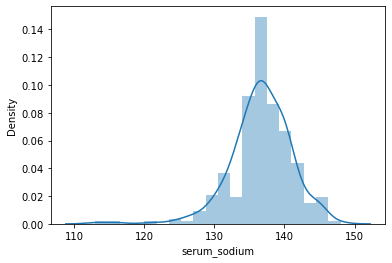

In [158]:
for col in continous_columns:
    plt.figure()
    sns.distplot(df[col])

Nous remarquons que toutes nos courbes ne sont pas centrées en 0. Ce qui nous laisse immédiatement comprendre que ces données n'ont pas été standardisées. Pas mal de ces variables ne suivent pas une distribution normale, mais pas toute. Ils ont une distribrution asymétrique

## Examen de la relation existant entre les variables

In [159]:
#sns.pairplot(df)

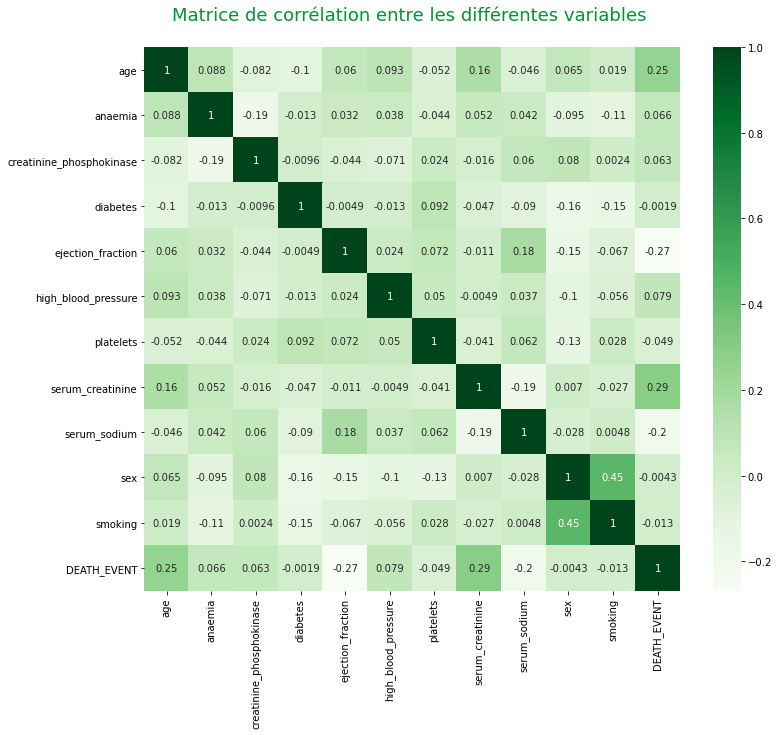

In [160]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='Greens')
plt.title("Matrice de corrélation entre les différentes variables \n", fontsize=18, color='#009432')
plt.show()

#On trace une matrice de corrélation

#Plus une corrélation est proche de 1, plus les deux variables évoluent positivement les unes avec les autres; donc quand l'une 
#augmente, l'autre augmente aussi!!! Dans notre cas, nos variables sont faiblement corrélées les unes des autres.

In [161]:
df.corr()['age'].sort_values()

diabetes                   -0.101012
creatinine_phosphokinase   -0.081584
platelets                  -0.052354
serum_sodium               -0.045966
smoking                     0.018668
ejection_fraction           0.060098
sex                         0.065430
anaemia                     0.088006
high_blood_pressure         0.093289
serum_creatinine            0.159187
DEATH_EVENT                 0.253729
age                         1.000000
Name: age, dtype: float64

## 2. Pré-processing ou pré-traitement des données

In [173]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [175]:
df = data.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [177]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0) #on met 20% de 299 dans le testset

In [178]:
trainset['DEATH_EVENT'].value_counts() 

0    166
1     73
Name: DEATH_EVENT, dtype: int64

In [179]:
testset['DEATH_EVENT'].value_counts() 

0    37
1    23
Name: DEATH_EVENT, dtype: int64

In [180]:
def preprocessing(df):
    
    X = df.drop('DEATH_EVENT', axis = 1)
    y = df['DEATH_EVENT']
    
    print(y.value_counts())
    
    return X, y

In [181]:
X_train, y_train = preprocessing(trainset)

0    166
1     73
Name: DEATH_EVENT, dtype: int64


In [182]:
X_test, y_test = preprocessing(testset)

0    37
1    23
Name: DEATH_EVENT, dtype: int64


## Modélisation

### 1. Régression logistique

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

In [186]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False), SelectKBest(f_classif, k=10))

In [187]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0)) #Pour le modèle SVM, il faut normaliser les données
#contrairement aux modèles des arbres de décision
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier()) #on normalise aussi le KNN

In [188]:
dict_of_models = {'RandomForest' : RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM' : SVM,
                  'KNN' : KNN
                 }

In [191]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label = 'Train score')
    plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
    plt.legend()

[[34  3]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        37
           1       0.84      0.70      0.76        23

    accuracy                           0.83        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.83      0.83      0.83        60



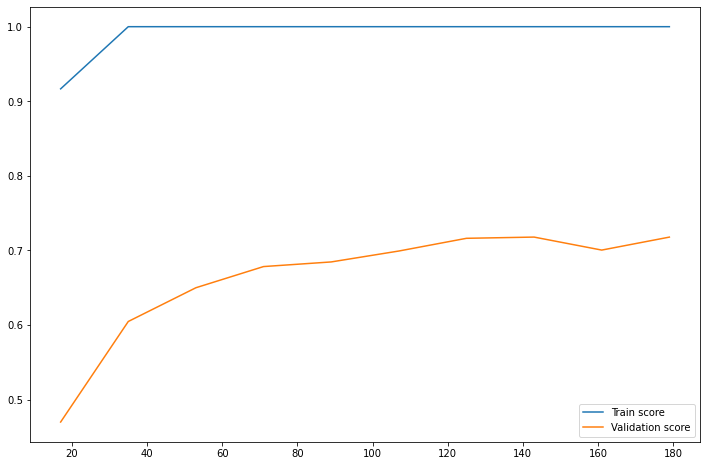

In [192]:
evaluation(model)

RandomForest
[[34  3]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        37
           1       0.84      0.70      0.76        23

    accuracy                           0.83        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.83      0.83      0.83        60

AdaBoost
[[34  3]
 [ 9 14]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.82      0.61      0.70        23

    accuracy                           0.80        60
   macro avg       0.81      0.76      0.77        60
weighted avg       0.80      0.80      0.79        60

SVM
[[36  1]
 [10 13]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.93      0.57      0.70        23

    accuracy                           0.82        60
   macro avg       0.86      0.77      0.79  

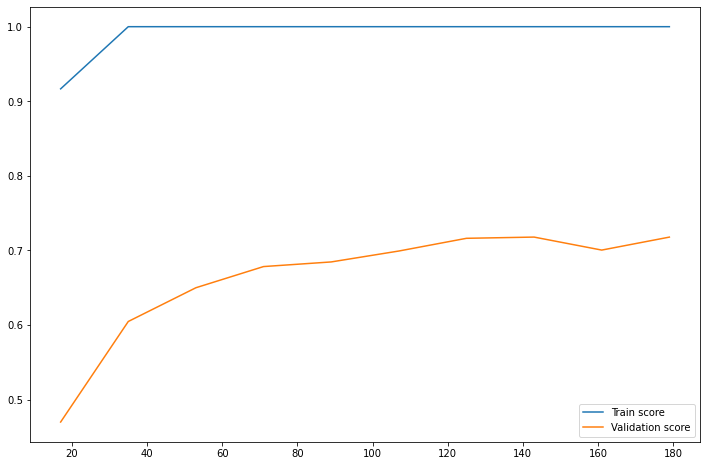

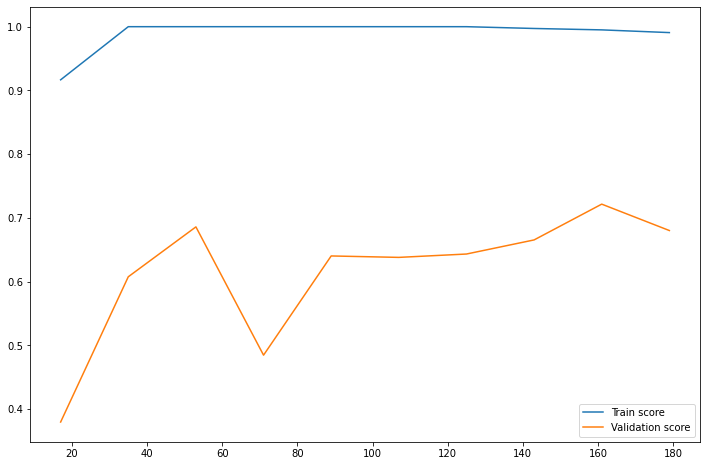

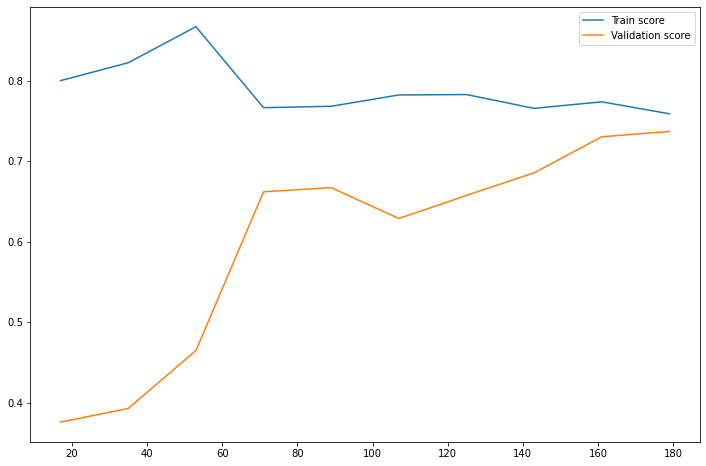

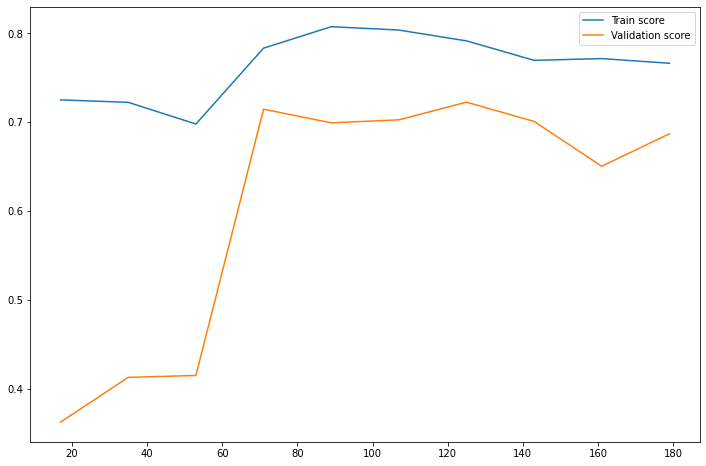

In [193]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [184]:
model = LogisticRegression(max_iter=50)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8333333333333334

In [ ]:
model = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=len(X.columns),verbose=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
model = RFE(estimator=RandomForestClassifier(),n_features_to_select=len(X.columns),verbose=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
model =   RFE(estimator=KNeighborsClassifier(n_neighbors=12,),n_features_to_select=len(X.columns),verbose=True) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))